## Colab Setup

In [1]:
# https://opencv.org/
!apt-get -qq install -y libsm6 libxext6 && pip install -q -U opencv-python
import cv2
# http://pytorch.org/
from os import path
from wheel.pep425tags import get_abbr_impl, get_impl_ver, get_abi_tag
platform = '{}{}-{}'.format(get_abbr_impl(), get_impl_ver(), get_abi_tag())

accelerator = 'cu80' if path.exists('/opt/bin/nvidia-smi') else 'cpu'
print("accelerator:", accelerator)
!pip install lxml==4.0
!pip install http://download.pytorch.org/whl/{accelerator}/torch-0.3.0.post4-{platform}-linux_x86_64.whl torchvision

# get terminator
!pip install fastai

# may not be necessary
!apt-get install -y libtiff5-dev

!pip install Pillow==4.1.1
!pip install --force-reinstall scipy
!pip install torchvision

accelerator: cu80
    100% |████████████████████████████████| 5.3MB 5.6MB/s 
    54% |█████████████████▌              | 323.6MB 45.5MB/s eta 0:00:06

    100% |████████████████████████████████| 592.3MB 52.3MB/s 
    100% |████████████████████████████████| 61kB 5.3MB/s 
    100% |████████████████████████████████| 2.0MB 9.0MB/s 
  Found existing installation: Pillow 4.0.0
    Uninstalling Pillow-4.0.0:
      Successfully uninstalled Pillow-4.0.0
    100% |████████████████████████████████| 122kB 8.7MB/s 
    100% |████████████████████████████████| 3.4MB 10.7MB/s 
    100% |████████████████████████████████| 51kB 17.4MB/s 
    63% |████████████████████▎           | 1.4MB 32.4MB/s eta 0:00:01

    100% |████████████████████████████████| 2.2MB 13.0MB/s 
    100% |████████████████████████████████| 1.5MB 15.8MB/s 
    100% |████████████████████████████████| 184kB 22.9MB/s 
    100% |████████████████████████████████| 51kB 18.3MB/s 
    100% |████████████████████████████████| 112kB 18.8MB/s 
    100% |████████████████████████████████| 71kB 19.8MB/s 
    100% |████████████████████████████████| 13.7MB 2.8MB/s 


    100% |████████████████████████████████| 112kB 23.5MB/s 
    100% |████████████████████████████████| 92kB 23.3MB/s 
    100% |████████████████████████████████| 81kB 21.8MB/s 
  Running setup.py bdist_wheel for torchtext ... - \ done
  Stored in directory: /content/.cache/pip/wheels/42/a6/f4/b267328bde6bb680094a0c173e8e5627ccc99543abded97204
  Running setup.py bdist_wheel for feather-format ... - done
  Stored in directory: /content/.cache/pip/wheels/85/7d/12/2dfa5c0195f921ac935f5e8f27deada74972edc0ae9988a9c1
  Running setup.py bdist_wheel for bcolz ... - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | /

 - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - done
  Stored in directory: /content/.cache/pip/wheels/9f/78/26/fb8c0acb91a100dc8914bf236c4eaa4b207cb876893c40b745
  Running setup.py bdist_wheel for pandas-summary ... - done
  Stored in directory: /content/.cache/pip/wheels/86/a9/6b/36b727a9ec687dac08bd3d0501cddd7b1a223943513eb04a03
Successfully built torchtext feather-format bcolz pandas-summary
plotnine 0.3.0 has requirement scipy>=1.0.0, but you'll have scipy 0.19.1 which is incompatible.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libjbig-dev libjbig0 liblzma-dev libtiff5 libtiffxx5
Suggested packages:
  liblzma-doc
The following NEW packages will be installed:
  libjbig-dev libjbig0 liblzma-dev libtiff5 libtiff5-dev libtiffxx5
0 upgraded, 6 newly installed, 0 to remove and 0 not upgraded.
Need to get 624 

    100% |████████████████████████████████| 31.2MB 1.3MB/s 
    100% |████████████████████████████████| 12.2MB 3.6MB/s 
  Found existing installation: numpy 1.14.5
    Uninstalling numpy-1.14.5:
      Successfully uninstalled numpy-1.14.5
  Found existing installation: scipy 0.19.1
    Uninstalling scipy-0.19.1:
      Successfully uninstalled scipy-0.19.1


## CIFAR 10

In [0]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

You can get the data via:

    wget http://pjreddie.com/media/files/cifar.tgz

In [0]:
from fastai.conv_learner import *
import os
import glob
import shutil

PATH = "data/cifar10/"
os.makedirs(PATH,exist_ok=True)

In [23]:
#!rm -rf ./data/
!mkdir -p ./data/; cd ./data/; wget http://pjreddie.com/media/files/cifar.tgz; tar -xzf cifar.tgz; rsync -a cifar/ cifar10/

URL transformed to HTTPS due to an HSTS policy
--2018-07-19 17:49:38--  https://pjreddie.com/media/files/cifar.tgz
Resolving pjreddie.com (pjreddie.com)... 128.208.3.39
Connecting to pjreddie.com (pjreddie.com)|128.208.3.39|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168584360 (161M) [application/octet-stream]
Saving to: ‘cifar.tgz’

cifar.tgz           100%[===================>] 160.77M  21.2MB/s    in 8.4s    

2018-07-19 17:49:47 (19.2 MB/s) - ‘cifar.tgz’ saved [168584360/168584360]



In [0]:
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
stats = (np.array([ 0.4914 ,  0.48216,  0.44653]), np.array([ 0.24703,  0.24349,  0.26159]))

In [25]:
!ls ./data/cifar10/
!cd ./data/cifar10/train/; rm *automobile*;
!cd ./data/cifar10/test/; rm *automobile*;
!cd ./data/cifar10/train/; mkdir -p plane car bird cat deer dog frog horse ship truck 
!cd ./data/cifar10/test/; mkdir -p plane car bird cat deer dog frog horse ship truck 

labels.txt  test  train


In [0]:
train_path = PATH + 'train/'
for class_now in classes:
    identifier = train_path + '*' + class_now + '*'
    class_files = glob.glob(identifier)
    file_destination = train_path + class_now
    # move all frog files to proper class directory
    for file_to_move in class_files:
        shutil.move(file_to_move, file_destination)

# do all the same but now for the test data
test_path = PATH + 'test/'
for class_now in classes:
    identifier = test_path + '*' + class_now + '*'
    class_files = glob.glob(identifier)
    file_destination = test_path + class_now
    for file_to_move in class_files:
        shutil.move(file_to_move, file_destination)

In [27]:
!ls data/cifar10/train/

bird  car  cat	deer  dog  frog  horse	plane  ship  truck


In [0]:
def get_data(sz,bs):
    tfms = tfms_from_stats(stats, sz, aug_tfms=[RandomFlip()], pad=sz//8)
    return ImageClassifierData.from_paths(PATH, val_name='test', tfms=tfms, bs=bs)

In [0]:
bs=256

### Look at data

In [0]:
data = get_data(32,4)

In [0]:
x,y=next(iter(data.trn_dl))

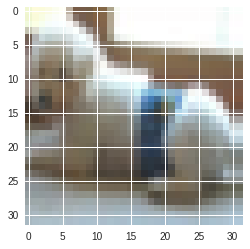

In [32]:
plt.imshow(data.trn_ds.denorm(x)[0]);

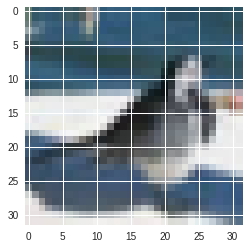

In [33]:
plt.imshow(data.trn_ds.denorm(x)[1]);

## Fully connected model

In [0]:
data = get_data(32,bs)

In [0]:
lr=1e-2

From [this notebook](https://github.com/KeremTurgutlu/deeplearning/blob/master/Exploring%20Optimizers.ipynb) by our student Kerem Turgutlu:

In [0]:
class SimpleNet(nn.Module):
    def __init__(self, layers):
        super().__init__()
        self.layers = nn.ModuleList(
            [nn.Linear(layers[i], layers[i + 1]) for i in range(len(layers) - 1)])
        
    def forward(self, x):
        x = x.view(x.size(0), -1)
        for l in self.layers:
            l_x = l(x)
            x = F.relu(l_x)
        return F.log_softmax(l_x, dim=-1)

In [0]:
learn = ConvLearner.from_model_data(SimpleNet([32*32*3, 40,10]), data)

In [38]:
learn, [o.numel() for o in learn.model.parameters()]

(SimpleNet(
   (layers): ModuleList(
     (0): Linear(in_features=3072, out_features=40)
     (1): Linear(in_features=40, out_features=10)
   )
 ), [122880, 40, 400, 10])

In [39]:
learn.summary()

OrderedDict([('Linear-1',
              OrderedDict([('input_shape', [-1, 3072]),
                           ('output_shape', [-1, 40]),
                           ('trainable', True),
                           ('nb_params', 122920)])),
             ('Linear-2',
              OrderedDict([('input_shape', [-1, 40]),
                           ('output_shape', [-1, 10]),
                           ('trainable', True),
                           ('nb_params', 410)]))])

In [40]:
learn.lr_find()

 75%|███████▌  | 132/176 [00:17<00:05,  7.34it/s, loss=16]  

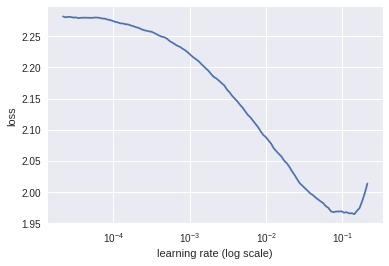

In [41]:
learn.sched.plot()

In [42]:
%time learn.fit(lr, 2)

epoch      trn_loss   val_loss   accuracy   
    0      1.68059    1.571405   0.434889  
    1      1.610453   1.504128   0.468111  
CPU times: user 51.8 s, sys: 28.6 s, total: 1min 20s
Wall time: 53.3 s


[array([1.50413]), 0.4681111110581292]

In [43]:
%time learn.fit(lr, 2, cycle_len=1)

epoch      trn_loss   val_loss   accuracy   
    0      1.545659   1.466069   0.481333  
    1      1.529846   1.449963   0.486     
CPU times: user 52.7 s, sys: 28.1 s, total: 1min 20s
Wall time: 53.4 s


[array([1.44996]), 0.486]

## CNN

In [0]:
class ConvNet(nn.Module):
    def __init__(self, layers, c):
        super().__init__()
        self.layers = nn.ModuleList(
            [nn.Conv2d(layers[i], layers[i + 1], kernel_size=3, stride=2) for i in range(len(layers) - 1)])
        self.pool = nn.AdaptiveMaxPool2d(1)
        self.out = nn.Linear(layers[-1], c)
        
    def forward(self, x):
        for l in self.layers: x = F.relu(l(x))
        x = self.pool(x)
        x = x.view(x.size(0), -1)
        return F.log_softmax(self.out(x), dim=-1)

In [0]:
learn = ConvLearner.from_model_data( ConvNet([3, 20, 40, 80], 10) , data)

In [46]:
learn.summary()

OrderedDict([('Conv2d-1',
              OrderedDict([('input_shape', [-1, 3, 32, 32]),
                           ('output_shape', [-1, 20, 15, 15]),
                           ('trainable', True),
                           ('nb_params', 560)])),
             ('Conv2d-2',
              OrderedDict([('input_shape', [-1, 20, 15, 15]),
                           ('output_shape', [-1, 40, 7, 7]),
                           ('trainable', True),
                           ('nb_params', 7240)])),
             ('Conv2d-3',
              OrderedDict([('input_shape', [-1, 40, 7, 7]),
                           ('output_shape', [-1, 80, 3, 3]),
                           ('trainable', True),
                           ('nb_params', 28880)])),
             ('AdaptiveMaxPool2d-4',
              OrderedDict([('input_shape', [-1, 80, 3, 3]),
                           ('output_shape', [-1, 80, 1, 1]),
                           ('nb_params', 0)])),
             ('Linear-5',
              OrderedDict

In [47]:
learn.lr_find(end_lr=100)

 96%|█████████▌| 169/176 [00:23<00:00,  7.12it/s, loss=9.64]

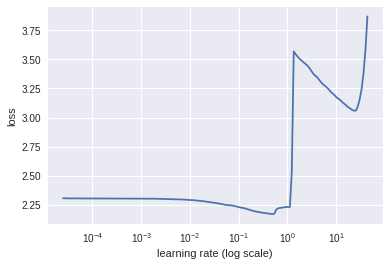

In [48]:
learn.sched.plot()

In [49]:
%time learn.fit(1e-1, 2)

epoch      trn_loss   val_loss   accuracy   
    0      1.667611   1.623774   0.395444  
    1      1.480255   1.410024   0.494222  
CPU times: user 53.9 s, sys: 29.4 s, total: 1min 23s
Wall time: 55.3 s


[array([1.41002]), 0.49422222211625844]

In [50]:
%time learn.fit(1e-1, 4, cycle_len=1)

epoch      trn_loss   val_loss   accuracy   
    0      1.323241   1.246144   0.548222  
    1      1.251463   1.185409   0.571111  


    2      1.212132   1.14806    0.582889  
    3      1.18927    1.128326   0.59      
CPU times: user 1min 47s, sys: 58.2 s, total: 2min 45s
Wall time: 1min 49s


[array([1.12833]), 0.5900000000529819]

## Refactored

In [0]:
class ConvLayer(nn.Module):
    def __init__(self, ni, nf):
        super().__init__()
        self.conv = nn.Conv2d(ni, nf, kernel_size=3, stride=2, padding=1)
        
    def forward(self, x): return F.relu(self.conv(x))

In [0]:
class ConvNet2(nn.Module):
    def __init__(self, layers, c):
        super().__init__()
        self.layers = nn.ModuleList(
            [ConvLayer(layers[i], layers[i + 1]) for i in range(len(layers) - 1)]
        )
        self.out = nn.Linear(layers[-1], c)
        
    def forward(self, x):
        for l in self.layers: x = l(x)
        x = F.adaptive_max_pool2d(x, 1)
        x = x.view(x.size(0), -1)
        return F.log_softmax(self.out(x), dim=-1)

In [0]:
learn = ConvLearner.from_model_data(ConvNet2([3, 20, 40, 80], 10), data)

In [54]:
learn.summary()

OrderedDict([('Conv2d-1',
              OrderedDict([('input_shape', [-1, 3, 32, 32]),
                           ('output_shape', [-1, 20, 16, 16]),
                           ('trainable', True),
                           ('nb_params', 560)])),
             ('ConvLayer-2',
              OrderedDict([('input_shape', [-1, 3, 32, 32]),
                           ('output_shape', [-1, 20, 16, 16]),
                           ('nb_params', 0)])),
             ('Conv2d-3',
              OrderedDict([('input_shape', [-1, 20, 16, 16]),
                           ('output_shape', [-1, 40, 8, 8]),
                           ('trainable', True),
                           ('nb_params', 7240)])),
             ('ConvLayer-4',
              OrderedDict([('input_shape', [-1, 20, 16, 16]),
                           ('output_shape', [-1, 40, 8, 8]),
                           ('nb_params', 0)])),
             ('Conv2d-5',
              OrderedDict([('input_shape', [-1, 40, 8, 8]),
                 

In [55]:
%time learn.fit(1e-1, 2)

epoch      trn_loss   val_loss   accuracy   
    0      1.678505   1.544429   0.437444  
    1      1.499243   1.381312   0.490778  
CPU times: user 53.7 s, sys: 28.8 s, total: 1min 22s
Wall time: 54.9 s


[array([1.38131]), 0.4907777778307597]

In [56]:
%time learn.fit(1e-1, 2, cycle_len=1)

epoch      trn_loss   val_loss   accuracy   
    0      1.347718   1.264543   0.539222  
    1      1.278363   1.200065   0.567111  
CPU times: user 54 s, sys: 29.1 s, total: 1min 23s
Wall time: 55.2 s


[array([1.20007]), 0.567111111164093]

## BatchNorm

In [0]:
class BnLayer(nn.Module):
    def __init__(self, ni, nf, stride=2, kernel_size=3):
        super().__init__()
        self.conv = nn.Conv2d(ni, nf, kernel_size=kernel_size, stride=stride,
                              bias=False, padding=1)
        self.a = nn.Parameter(torch.zeros(nf,1,1))
        self.m = nn.Parameter(torch.ones(nf,1,1))
        
    def forward(self, x):
        x = F.relu(self.conv(x))
        x_chan = x.transpose(0,1).contiguous().view(x.size(1), -1)
        if self.training:
            self.means = x_chan.mean(1)[:,None,None]
            self.stds  = x_chan.std (1)[:,None,None]
        return (x-self.means) / self.stds * self.m + self.a

In [0]:
class ConvBnNet(nn.Module):
    def __init__(self, layers, c):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 10, kernel_size=5, stride=1, padding=2)
        self.layers = nn.ModuleList([BnLayer(layers[i], layers[i + 1])
            for i in range(len(layers) - 1)])
        self.out = nn.Linear(layers[-1], c)
        
    def forward(self, x):
        x = self.conv1(x)
        for l in self.layers: x = l(x)
        x = F.adaptive_max_pool2d(x, 1)
        x = x.view(x.size(0), -1)
        return F.log_softmax(self.out(x), dim=-1)

In [0]:
learn = ConvLearner.from_model_data(ConvBnNet([10, 20, 40, 80, 160], 10), data)

In [60]:
learn.summary()

OrderedDict([('Conv2d-1',
              OrderedDict([('input_shape', [-1, 3, 32, 32]),
                           ('output_shape', [-1, 10, 32, 32]),
                           ('trainable', True),
                           ('nb_params', 760)])),
             ('Conv2d-2',
              OrderedDict([('input_shape', [-1, 10, 32, 32]),
                           ('output_shape', [-1, 20, 16, 16]),
                           ('trainable', True),
                           ('nb_params', 1800)])),
             ('BnLayer-3',
              OrderedDict([('input_shape', [-1, 10, 32, 32]),
                           ('output_shape', [-1, 20, 16, 16]),
                           ('nb_params', 0)])),
             ('Conv2d-4',
              OrderedDict([('input_shape', [-1, 20, 16, 16]),
                           ('output_shape', [-1, 40, 8, 8]),
                           ('trainable', True),
                           ('nb_params', 7200)])),
             ('BnLayer-5',
              OrderedDict([

In [61]:
%time learn.fit(3e-2, 2)

epoch      trn_loss   val_loss   accuracy   
    0      1.482337   1.337573   0.517     
    1      1.293404   1.16487    0.584889  
CPU times: user 59.6 s, sys: 30.5 s, total: 1min 30s
Wall time: 1min


[array([1.16487]), 0.5848888887829251]

In [62]:
%time learn.fit(1e-1, 4, cycle_len=1)

epoch      trn_loss   val_loss   accuracy   
    0      1.163769   1.042276   0.627     
    1      1.063815   0.962462   0.657333  
 60%|██████    | 106/176 [00:16<00:10,  6.46it/s, loss=1.06]

    2      0.996609   0.893477   0.682556  
    3      0.937044   0.867612   0.691333  
CPU times: user 1min 58s, sys: 1min, total: 2min 59s
Wall time: 1min 59s


[array([0.86761]), 0.6913333334392971]

## Deep BatchNorm

In [0]:
class ConvBnNet2(nn.Module):
    def __init__(self, layers, c):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 10, kernel_size=5, stride=1, padding=2)
        self.layers = nn.ModuleList([BnLayer(layers[i], layers[i+1])
            for i in range(len(layers) - 1)])
        self.layers2 = nn.ModuleList([BnLayer(layers[i+1], layers[i + 1], 1)
            for i in range(len(layers) - 1)])
        self.out = nn.Linear(layers[-1], c)
        
    def forward(self, x):
        x = self.conv1(x)
        for l,l2 in zip(self.layers, self.layers2):
            x = l(x)
            x = l2(x)
        x = F.adaptive_max_pool2d(x, 1)
        x = x.view(x.size(0), -1)
        return F.log_softmax(self.out(x), dim=-1)

In [0]:
learn = ConvLearner.from_model_data(ConvBnNet2([10, 20, 40, 80, 160], 10), data)

In [65]:
%time learn.fit(1e-2, 2)

epoch      trn_loss   val_loss   accuracy   
    0      1.51556    1.362263   0.497     
    1      1.311081   1.247412   0.549111  
CPU times: user 1min 7s, sys: 32.8 s, total: 1min 40s
Wall time: 1min 7s


[array([1.24741]), 0.5491111112170749]

In [66]:
%time learn.fit(1e-2, 2, cycle_len=1)

epoch      trn_loss   val_loss   accuracy   
    0      1.133575   1.056642   0.616333  
    1      1.063666   0.990376   0.644444  
CPU times: user 1min 7s, sys: 33.2 s, total: 1min 40s
Wall time: 1min 8s


[array([0.99038]), 0.6444444444974263]

## Resnet

In [0]:
class ResnetLayer(BnLayer):
    def forward(self, x): return x + super().forward(x)

In [0]:
class Resnet(nn.Module):
    def __init__(self, layers, c):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 10, kernel_size=5, stride=1, padding=2)
        self.layers = nn.ModuleList([BnLayer(layers[i], layers[i+1])
            for i in range(len(layers) - 1)])
        self.layers2 = nn.ModuleList([ResnetLayer(layers[i+1], layers[i + 1], 1)
            for i in range(len(layers) - 1)])
        self.layers3 = nn.ModuleList([ResnetLayer(layers[i+1], layers[i + 1], 1)
            for i in range(len(layers) - 1)])
        self.out = nn.Linear(layers[-1], c)
        
    def forward(self, x):
        x = self.conv1(x)
        for l,l2,l3 in zip(self.layers, self.layers2, self.layers3):
            x = l3(l2(l(x)))
        x = F.adaptive_max_pool2d(x, 1)
        x = x.view(x.size(0), -1)
        return F.log_softmax(self.out(x), dim=-1)

In [0]:
learn = ConvLearner.from_model_data(Resnet([10, 20, 40, 80, 160], 10), data)

In [0]:
wd=1e-5

In [71]:
%time learn.fit(1e-2, 2, wds=wd)

epoch      trn_loss   val_loss   accuracy   
    0      1.549401   1.435359   0.480222  
    1      1.325646   1.182896   0.572889  
CPU times: user 1min 17s, sys: 37.4 s, total: 1min 54s
Wall time: 1min 21s


[array([1.1829]), 0.5728888889418708]

In [72]:
%time learn.fit(1e-2, 3, cycle_len=1, cycle_mult=2, wds=wd)

epoch      trn_loss   val_loss   accuracy   
    0      1.138848   1.065839   0.613889  
    1      1.110164   1.018927   0.634333  
 39%|███▉      | 69/176 [00:15<00:23,  4.50it/s, loss=1.03]

    2      0.974731   0.952778   0.659222  
    3      1.015718   0.948112   0.657889  
 97%|█████████▋| 170/176 [00:36<00:01,  4.70it/s, loss=0.913]

    4      0.912031   0.856802   0.690556  
    5      0.807989   0.790582   0.722222  
    6      0.756902   0.777511   0.723889  
CPU times: user 4min 29s, sys: 2min 10s, total: 6min 40s
Wall time: 4min 44s


[array([0.77751]), 0.7238888887829251]

In [73]:
%time learn.fit(1e-2, 8, cycle_len=4, wds=wd)

epoch      trn_loss   val_loss   accuracy   
    0      0.867518   0.80356    0.713778  
    1      0.783468   0.762186   0.730556  
 38%|███▊      | 66/176 [00:14<00:24,  4.42it/s, loss=0.728]

    2      0.6974     0.712079   0.750444  
    3      0.661112   0.696583   0.753889  
 95%|█████████▍| 167/176 [00:35<00:01,  4.76it/s, loss=0.756]

    4      0.755233   0.750697   0.732111  
    5      0.694193   0.718299   0.746     
    6      0.62141    0.653998   0.769444  
 14%|█▎        | 24/176 [00:07<00:49,  3.06it/s, loss=0.602]

    7      0.577406   0.652601   0.774     
    8      0.685771   0.695686   0.758778  
 85%|████████▌ | 150/176 [00:31<00:05,  4.82it/s, loss=0.625]

    9      0.606153   0.648893   0.769333  
    10     0.555237   0.607985   0.790333  
    11     0.512777   0.60627    0.789     
 11%|█         | 19/176 [00:06<00:52,  2.97it/s, loss=0.533]

    12     0.623287   0.646171   0.776889  
    13     0.567105   0.612734   0.791111  
 84%|████████▍ | 148/176 [00:31<00:05,  4.73it/s, loss=0.506]

    14     0.504523   0.575298   0.798667  
    15     0.462008   0.573084   0.801778  
    16     0.57744    0.646767   0.776667  
 10%|█         | 18/176 [00:06<00:52,  3.00it/s, loss=0.569]

    17     0.519751   0.579189   0.798778  
    18     0.46322    0.57236    0.805667  
 84%|████████▍ | 148/176 [00:30<00:05,  4.81it/s, loss=0.432]

    19     0.436043   0.549416   0.814556  
    20     0.52569    0.633352   0.788111  
    21     0.484033   0.586896   0.801778  
 10%|█         | 18/176 [00:06<00:54,  2.92it/s, loss=0.466]

    22     0.421024   0.543606   0.813     
    23     0.381901   0.539831   0.816     
 84%|████████▍ | 148/176 [00:30<00:05,  4.80it/s, loss=0.494]

    24     0.504343   0.60829    0.796333  
    25     0.452162   0.569322   0.807444  
    26     0.392414   0.551595   0.818667  
 10%|█         | 18/176 [00:06<00:53,  2.93it/s, loss=0.384]

    27     0.354225   0.54811    0.818778  
    28     0.469553   0.619279   0.793333  
 84%|████████▍ | 148/176 [00:31<00:05,  4.74it/s, loss=0.43] 

    29     0.425034   0.559538   0.813444  
    30     0.367388   0.546259   0.822     
    31     0.324311   0.541641   0.825222  
CPU times: user 20min 21s, sys: 9min 58s, total: 30min 19s
Wall time: 21min 16s


[array([0.54164]), 0.8252222221692403]

## Resnet 2

In [0]:
class Resnet2(nn.Module):
    def __init__(self, layers, c, p=0.5):
        super().__init__()
        self.conv1 = BnLayer(3, 16, stride=1, kernel_size=7)
        self.layers = nn.ModuleList([BnLayer(layers[i], layers[i+1])
            for i in range(len(layers) - 1)])
        self.layers2 = nn.ModuleList([ResnetLayer(layers[i+1], layers[i + 1], 1)
            for i in range(len(layers) - 1)])
        self.layers3 = nn.ModuleList([ResnetLayer(layers[i+1], layers[i + 1], 1)
            for i in range(len(layers) - 1)])
        self.out = nn.Linear(layers[-1], c)
        self.drop = nn.Dropout(p)
        
    def forward(self, x):
        x = self.conv1(x)
        for l,l2,l3 in zip(self.layers, self.layers2, self.layers3):
            x = l3(l2(l(x)))
        x = F.adaptive_max_pool2d(x, 1)
        x = x.view(x.size(0), -1)
        x = self.drop(x)
        return F.log_softmax(self.out(x), dim=-1)

In [0]:
learn = ConvLearner.from_model_data(Resnet2([16, 32, 64, 128, 256], 10, 0.2), data)

In [0]:
wd=1e-6

In [0]:
%time learn.fit(1e-2, 2, wds=wd)

epoch      trn_loss   val_loss   accuracy   
    0      1.783207   1.471363   0.470667  
 24%|██▍       | 42/176 [00:17<00:54,  2.45it/s, loss=1.71]

In [0]:
%time learn.fit(1e-2, 3, cycle_len=1, cycle_mult=2, wds=wd)

In [0]:
%time learn.fit(1e-2, 8, cycle_len=4, wds=wd)

In [0]:
learn.save('tmp3')

In [0]:
log_preds,y = learn.TTA()
preds = np.mean(np.exp(log_preds),0)

In [0]:
metrics.log_loss(y,preds), accuracy(preds,y)

### End